In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
B = pd.read_csv('bank.csv')
B

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no


In [3]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [25]:
B.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing-loan         0
personal-loan        0
current-campaign     0
previous-campaign    0
subscribed           0
dtype: int64

In [4]:
B['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [5]:
from sklearn.utils import resample

In [6]:
bsn = B[B['subscribed']=='no']
bsy = B[B['subscribed'] =='yes']

In [7]:
BMU = resample(bsy, replace=True, n_samples=2000, random_state=42) 

In [8]:
NB = pd.concat([bsn, BMU])         # new bank
NB['subscribed'].value_counts()


no     4000
yes    2000
Name: subscribed, dtype: int64

In [9]:
Xf = list(NB.columns)
Xf.remove('subscribed')
Xf

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [10]:
EB = pd.get_dummies(NB[Xf], drop_first=True)
X = EB
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,35,7050,3,4,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1177,28,4579,2,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3498,58,462,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4366,59,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [11]:
Y = NB['subscribed'].map(lambda x: int(x=='yes'))

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [14]:
predy = model.predict(Xtest)

In [15]:
print(confusion_matrix(Ytest,predy))

[[961 264]
 [200 375]]


In [16]:
print(classification_report(Ytest,predy))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1225
           1       0.59      0.65      0.62       575

    accuracy                           0.74      1800
   macro avg       0.71      0.72      0.71      1800
weighted avg       0.75      0.74      0.75      1800



In [17]:
metrics.accuracy_score(Ytest, predy)

0.7422222222222222

In [18]:
auc1 = metrics.roc_auc_score(Ytest,model.predict_proba(Xtest)[:,1])
auc1

0.8246189884649513

In [19]:
fpr , tpr , thresholds = metrics.roc_curve(Ytest,model.predict_proba(Xtest)[:,1])

In [20]:
roc_auc = metrics.auc(fpr,tpr)

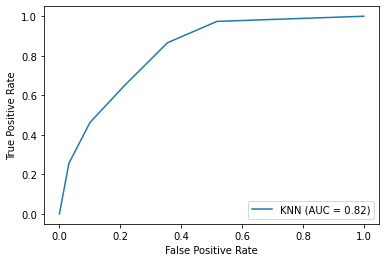

In [21]:
display = metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
params = [{'n_neighbors': range(3,10), 'metric':['euclidean','manhattan','chebyshev','canberra']}]
modelcv = GridSearchCV(KNeighborsClassifier(), params,cv=10,scoring='roc_auc')
modelcv.fit(Xtrain,Ytrain)


# https://scikit-learn.org/dev/modules/generated/sklearn.metrics.DistanceMetric.html
# for distances description

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc')

In [23]:
modelcv.best_params_

{'metric': 'canberra', 'n_neighbors': 3}

In [24]:
modelcv.best_score_

0.8796935164136339